In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

df = pd.read_csv('result.csv')
df

C:\Users\bookz\AppData\Local\Temp\ipykernel_29964\4271579396.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,text,date,score,Month
0,Our concern is that if ANY country is allowed ...,2024-04,1,4
1,Starship = Hope,2024-04,0,4
2,One year since first flight test of Starship. ...,2024-04,1,4
3,The eSafety Commissioner of Australia demanded...,2024-04,0,4
4,That is exactly the issue. Should the eSafet...,2024-04,0,4
...,...,...,...,...
115,NPR has become a hard left propaganda machine ...,2024-04,0,4
116,FSD Supervised continues to improve with every...,2024-04,0,4
117,Interesting series about a potentially good fu...,2024-04,0,4
118,United States laws prevent 𝕏 from participatin...,2024-04,0,4


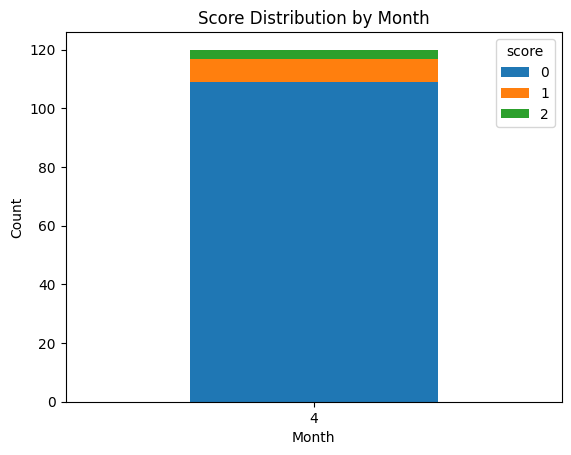

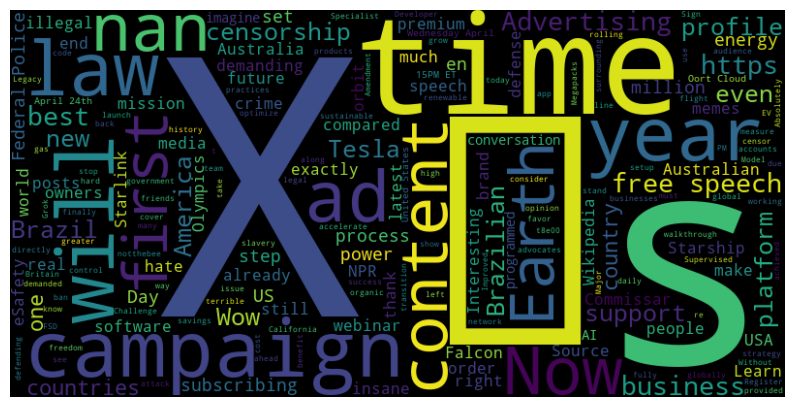

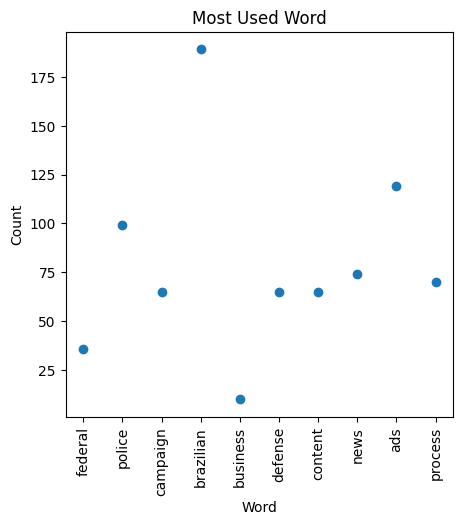

In [2]:
grouped = df.groupby(['Month', 'score']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Score Distribution by Month')
plt.xticks(rotation=0)
plt.legend(title='score')
plt.show()

# Concatenate all text data in the dataframe
text_data = ' '.join(df['text'].astype(str))

df['text'] = df['text'].fillna('')

cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(df['text'])
Xc = (X.T * X)
Xc.setdiag(0)
coocc_ar = Xc.toarray()

wordcloud = WordCloud(width=800, height=400).generate(text_data)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

most_used_word = cv.get_feature_names_out()
most_used_word = np.array(most_used_word)
most_used_word = most_used_word[np.argsort(np.sum(coocc_ar, axis=0))][::-1]

plt.figure(figsize=(5, 5))
plt.scatter(most_used_word[:10], np.sum(coocc_ar, axis=0)[:10])
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Most Used Word')
plt.xticks(rotation=90)
plt.show()


In [3]:
import io
import base64
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

# Convert the image to a base64-encoded string
image_base64 = base64.b64encode(buffer.getvalue()).decode()
plt.close()  # Close the plot to release memory

print(image_base64)

iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAIyUlEQVR4nO3WMQEAIAzAMMC/5+ECjiYKenbPzCwAADLO7wAAAN4ygAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAA

In [4]:
# dont forgot to run this part use in backend!
import dill
def visualization():
    import matplotlib
    import io
    import base64
    import os
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    matplotlib.use('agg')

    base_dir = "textback"
    models_folder = "models"
    csv_path = "result.csv"

    result_csv = os.path.join(base_dir, models_folder, csv_path)

    df = pd.read_csv(result_csv)
    grouped = df.groupby(['Month', 'score']).size().unstack(fill_value=0)

    grouped.plot(kind='bar', stacked=True)
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.title('Score Distribution by Month')
    plt.xticks(rotation=0)
    plt.legend(title='score')

    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)

    # Convert the image to a base64-encoded string
    image_base64 = base64.b64encode(buffer.getvalue()).decode()
    plt.close()  # Close the plot to release memory

    return image_base64

# with open('../backend/textback/models/visualization.pkl', 'wb') as f:
#     dill.dump(visualization, f)

In [5]:
# dont forgot to run this part use in backend!
def word_cloud():
    import pandas as pd
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud
    import os
    import matplotlib
    import io
    import base64
    buffer = io.BytesIO()
    matplotlib.use('agg')

    base_dir = "textback"
    models_folder = "models"
    csv_path = "result.csv"

    result_csv = os.path.join(base_dir, models_folder, csv_path)

    df = pd.read_csv(result_csv)
    # Concatenate all text data in the dataframe
    text_data = ' '.join(df['text'].astype(str))

    wordcloud = WordCloud(width=800, height=400).generate(text_data)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig(buffer, format='png')
    buffer.seek(0)

    # Convert the image to a base64-encoded string
    image_base64 = base64.b64encode(buffer.getvalue()).decode()
    plt.close()  # Close the plot to release memory

    return image_base64

with open('../backend/textback/models/wordcloud.pkl', 'wb') as f:
    dill.dump(word_cloud, f)

In [6]:
# dont forgot to run this part use in backend!
import dill
def mostuseword():
    from sklearn.feature_extraction.text import CountVectorizer
    import numpy as np
    import pandas as pd
    import os
    import base64
    import io
    import matplotlib.pyplot as plt
    import matplotlib
    buffer = io.BytesIO()
    matplotlib.use('agg')
    base_dir = "textback"
    models_folder = "models"
    csv_path = "result.csv"

    result_csv = os.path.join(base_dir, models_folder, csv_path)

    df = pd.read_csv(result_csv)
    df['text'] = df['text'].fillna('')

    cv = CountVectorizer(stop_words='english')
    X = cv.fit_transform(df['text'])
    Xc = (X.T * X)
    Xc.setdiag(0)
    coocc_ar = Xc.toarray()

    most_used_word = cv.get_feature_names_out()
    most_used_word = np.array(most_used_word)
    most_used_word = most_used_word[np.argsort(np.sum(coocc_ar, axis=0))][::-1]

    plt.figure(figsize=(5, 5))
    plt.scatter(most_used_word[:10], np.sum(coocc_ar, axis=0)[:10])
    plt.xlabel('Word')
    plt.ylabel('Count')
    plt.title('Most Used Word')
    plt.xticks(rotation=90)
    plt.savefig(buffer, format='png')
    buffer.seek(0)

    # Convert the image to a base64-encoded string
    image_base64 = base64.b64encode(buffer.getvalue()).decode()
    plt.close()  # Close the plot to release memory

    return image_base64

with open('../backend/textback/models/mostword.pkl', 'wb') as f:
    dill.dump(mostuseword, f)


In [7]:
# # use to check image_base64 work or not
# import base64
# from PIL import Image
# from io import BytesIO

# def base64_to_image(base64_string):
#     # Decode the Base64 string to bytes
#     image_data = base64.b64decode(base64_string)
    
#     # Create a BytesIO object to wrap the decoded image data
#     image_buffer = BytesIO(image_data)
    
#     # Open the image using PIL
#     image = Image.open(image_buffer)
    
#     return image

# image_Decode = mostuseword()
# final_image = base64_to_image(image_Decode)
# final_image.show()

In [8]:
visualization()

FileNotFoundError: [Errno 2] No such file or directory: 'textback\\models\\result.csv'